# Explore here

In [72]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [73]:
data.to_csv("../data/raw/data.csv", index = False)

In [51]:
data.shape

(48895, 16)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

As we can see the dataset have some NaN values mostly in last_review and reviews_per_month columns.

There is 8 categorical variables being: id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365

and 8 numerical variables: latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count

In [53]:
print(f"The number of duplicated Name records is: {data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


There is a high number of duplicates in name probably due to a very general description of the Airbnb.
The number of duplicated Host id indicate a same host having diferent Airbnb's.
As there is no duplicates in Id all the entries are unique.

In [74]:
data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


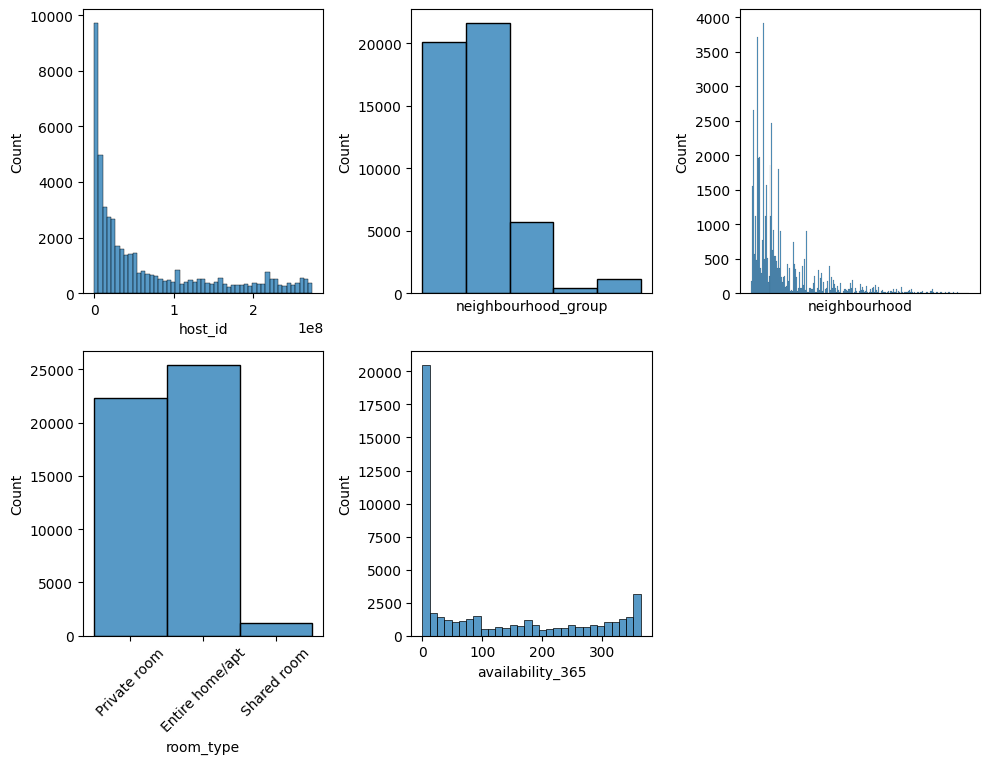

In [55]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = data, x = "host_id")
sns.histplot(ax = axis[0,1], data = data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data, x = "room_type")
sns.histplot(ax = axis[1,1], data = data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()
axis[1,0].tick_params(axis='x', rotation=45)

# Show the plot
plt.show()

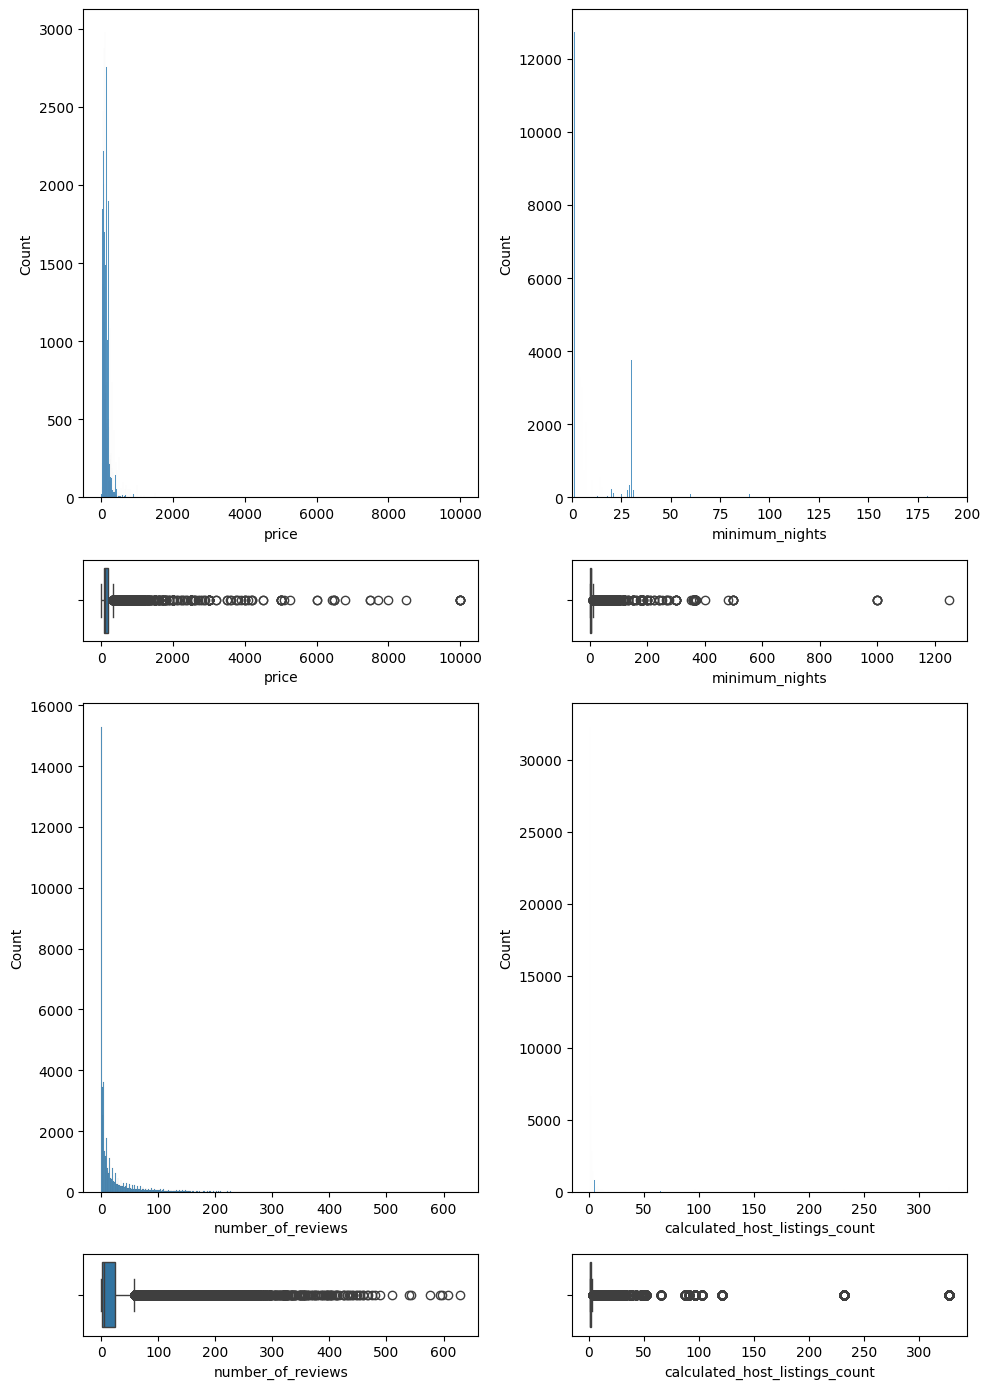

In [56]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "price")
sns.boxplot(ax = axis[1, 0], data = data, x = "price")

sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = data, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

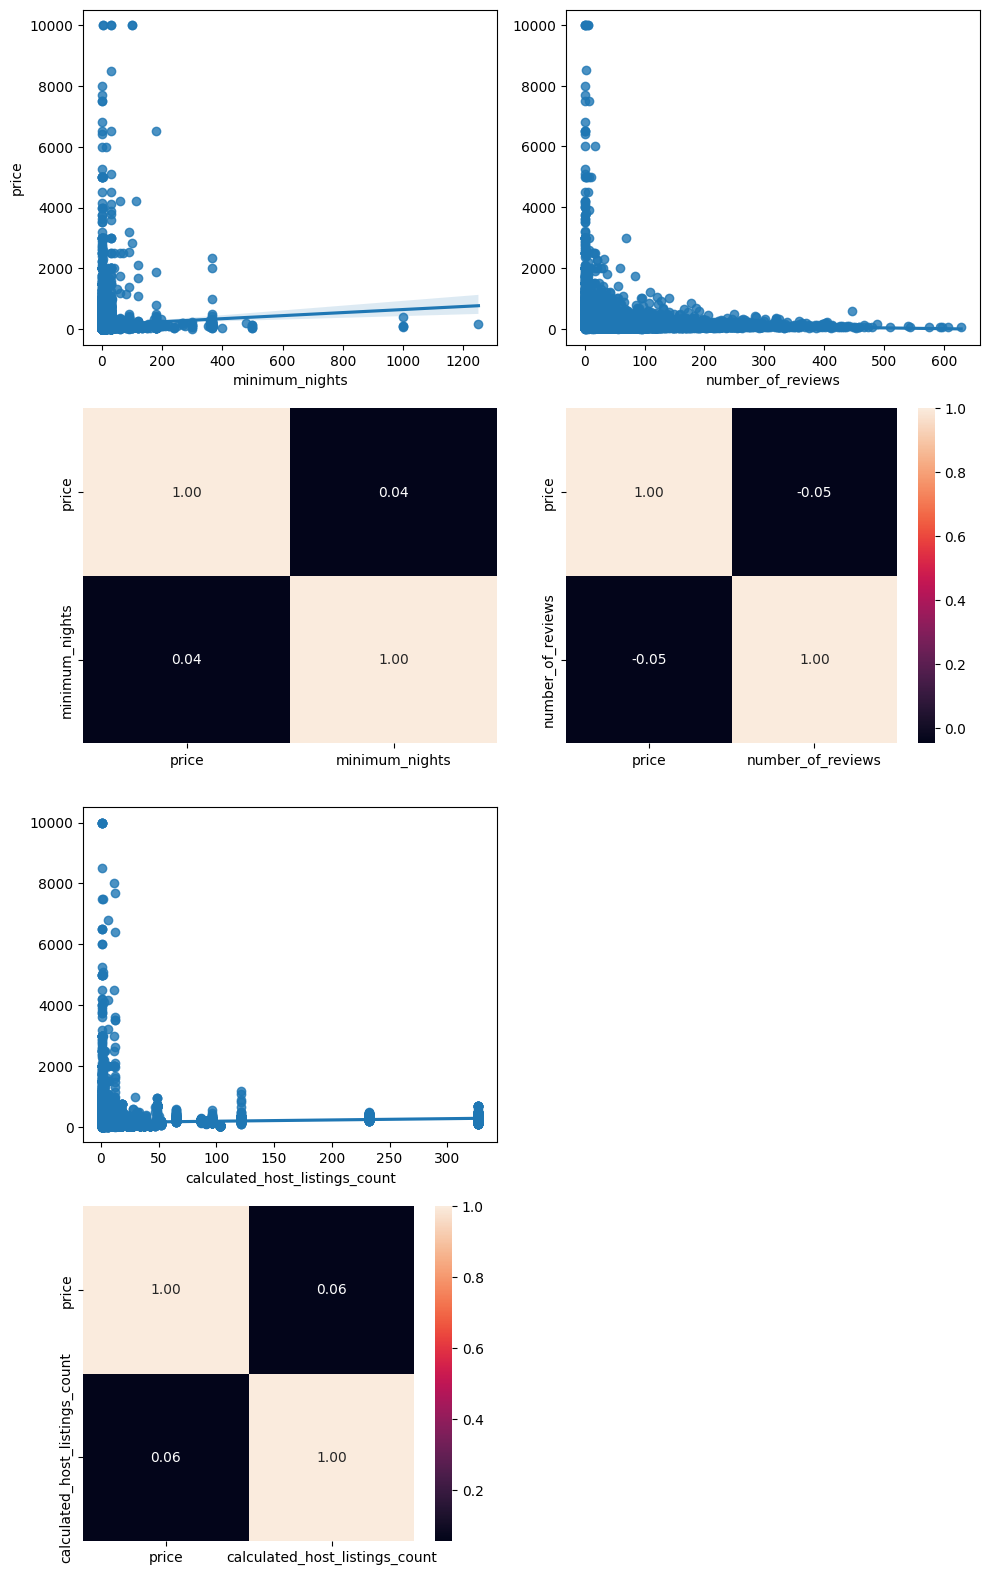

In [57]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))
 
sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

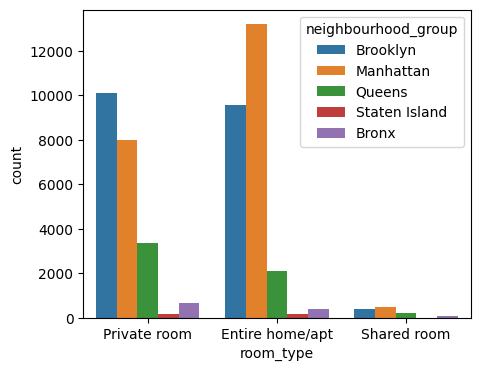

In [58]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

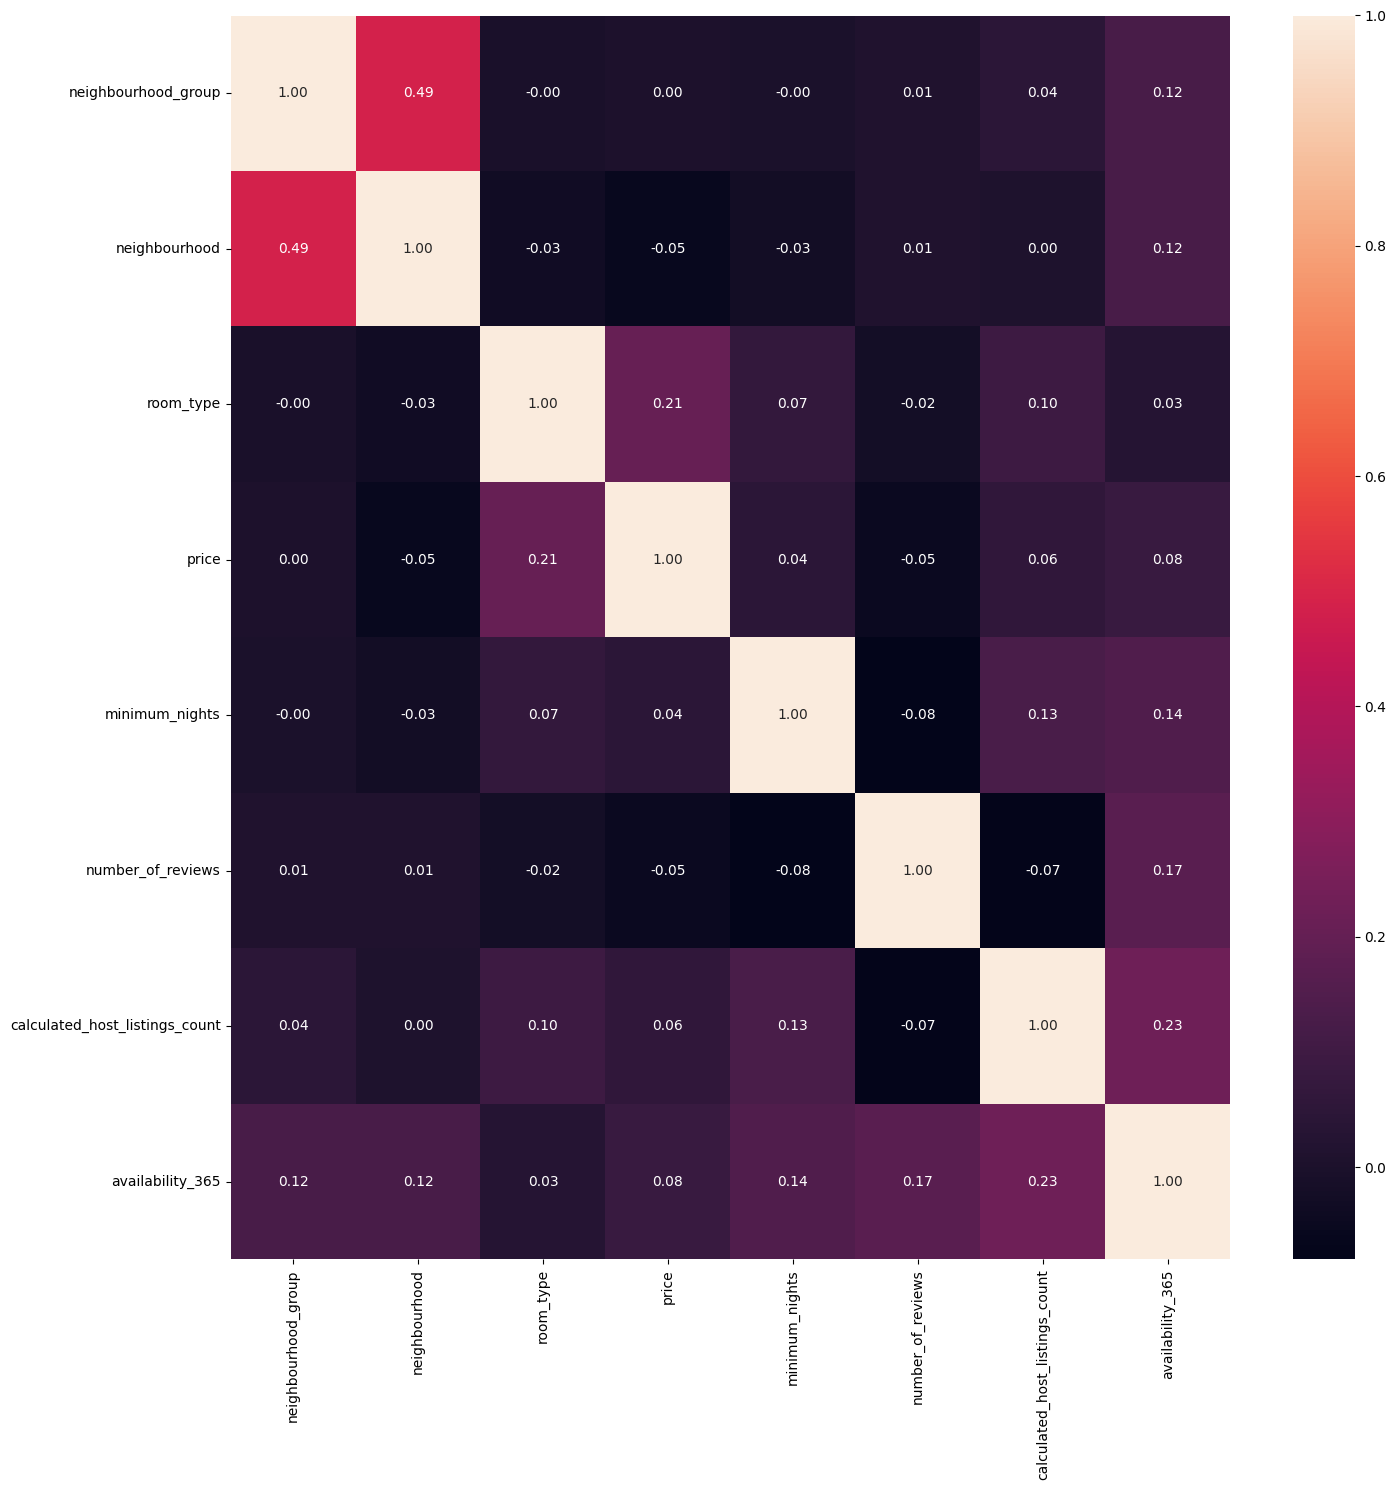

In [59]:
# Factorize the Room Type and Neighborhood Data
data["room_type"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_group"] = pd.factorize(data["neighbourhood_group"])[0]
data["neighbourhood"] = pd.factorize(data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

KeyboardInterrupt: 

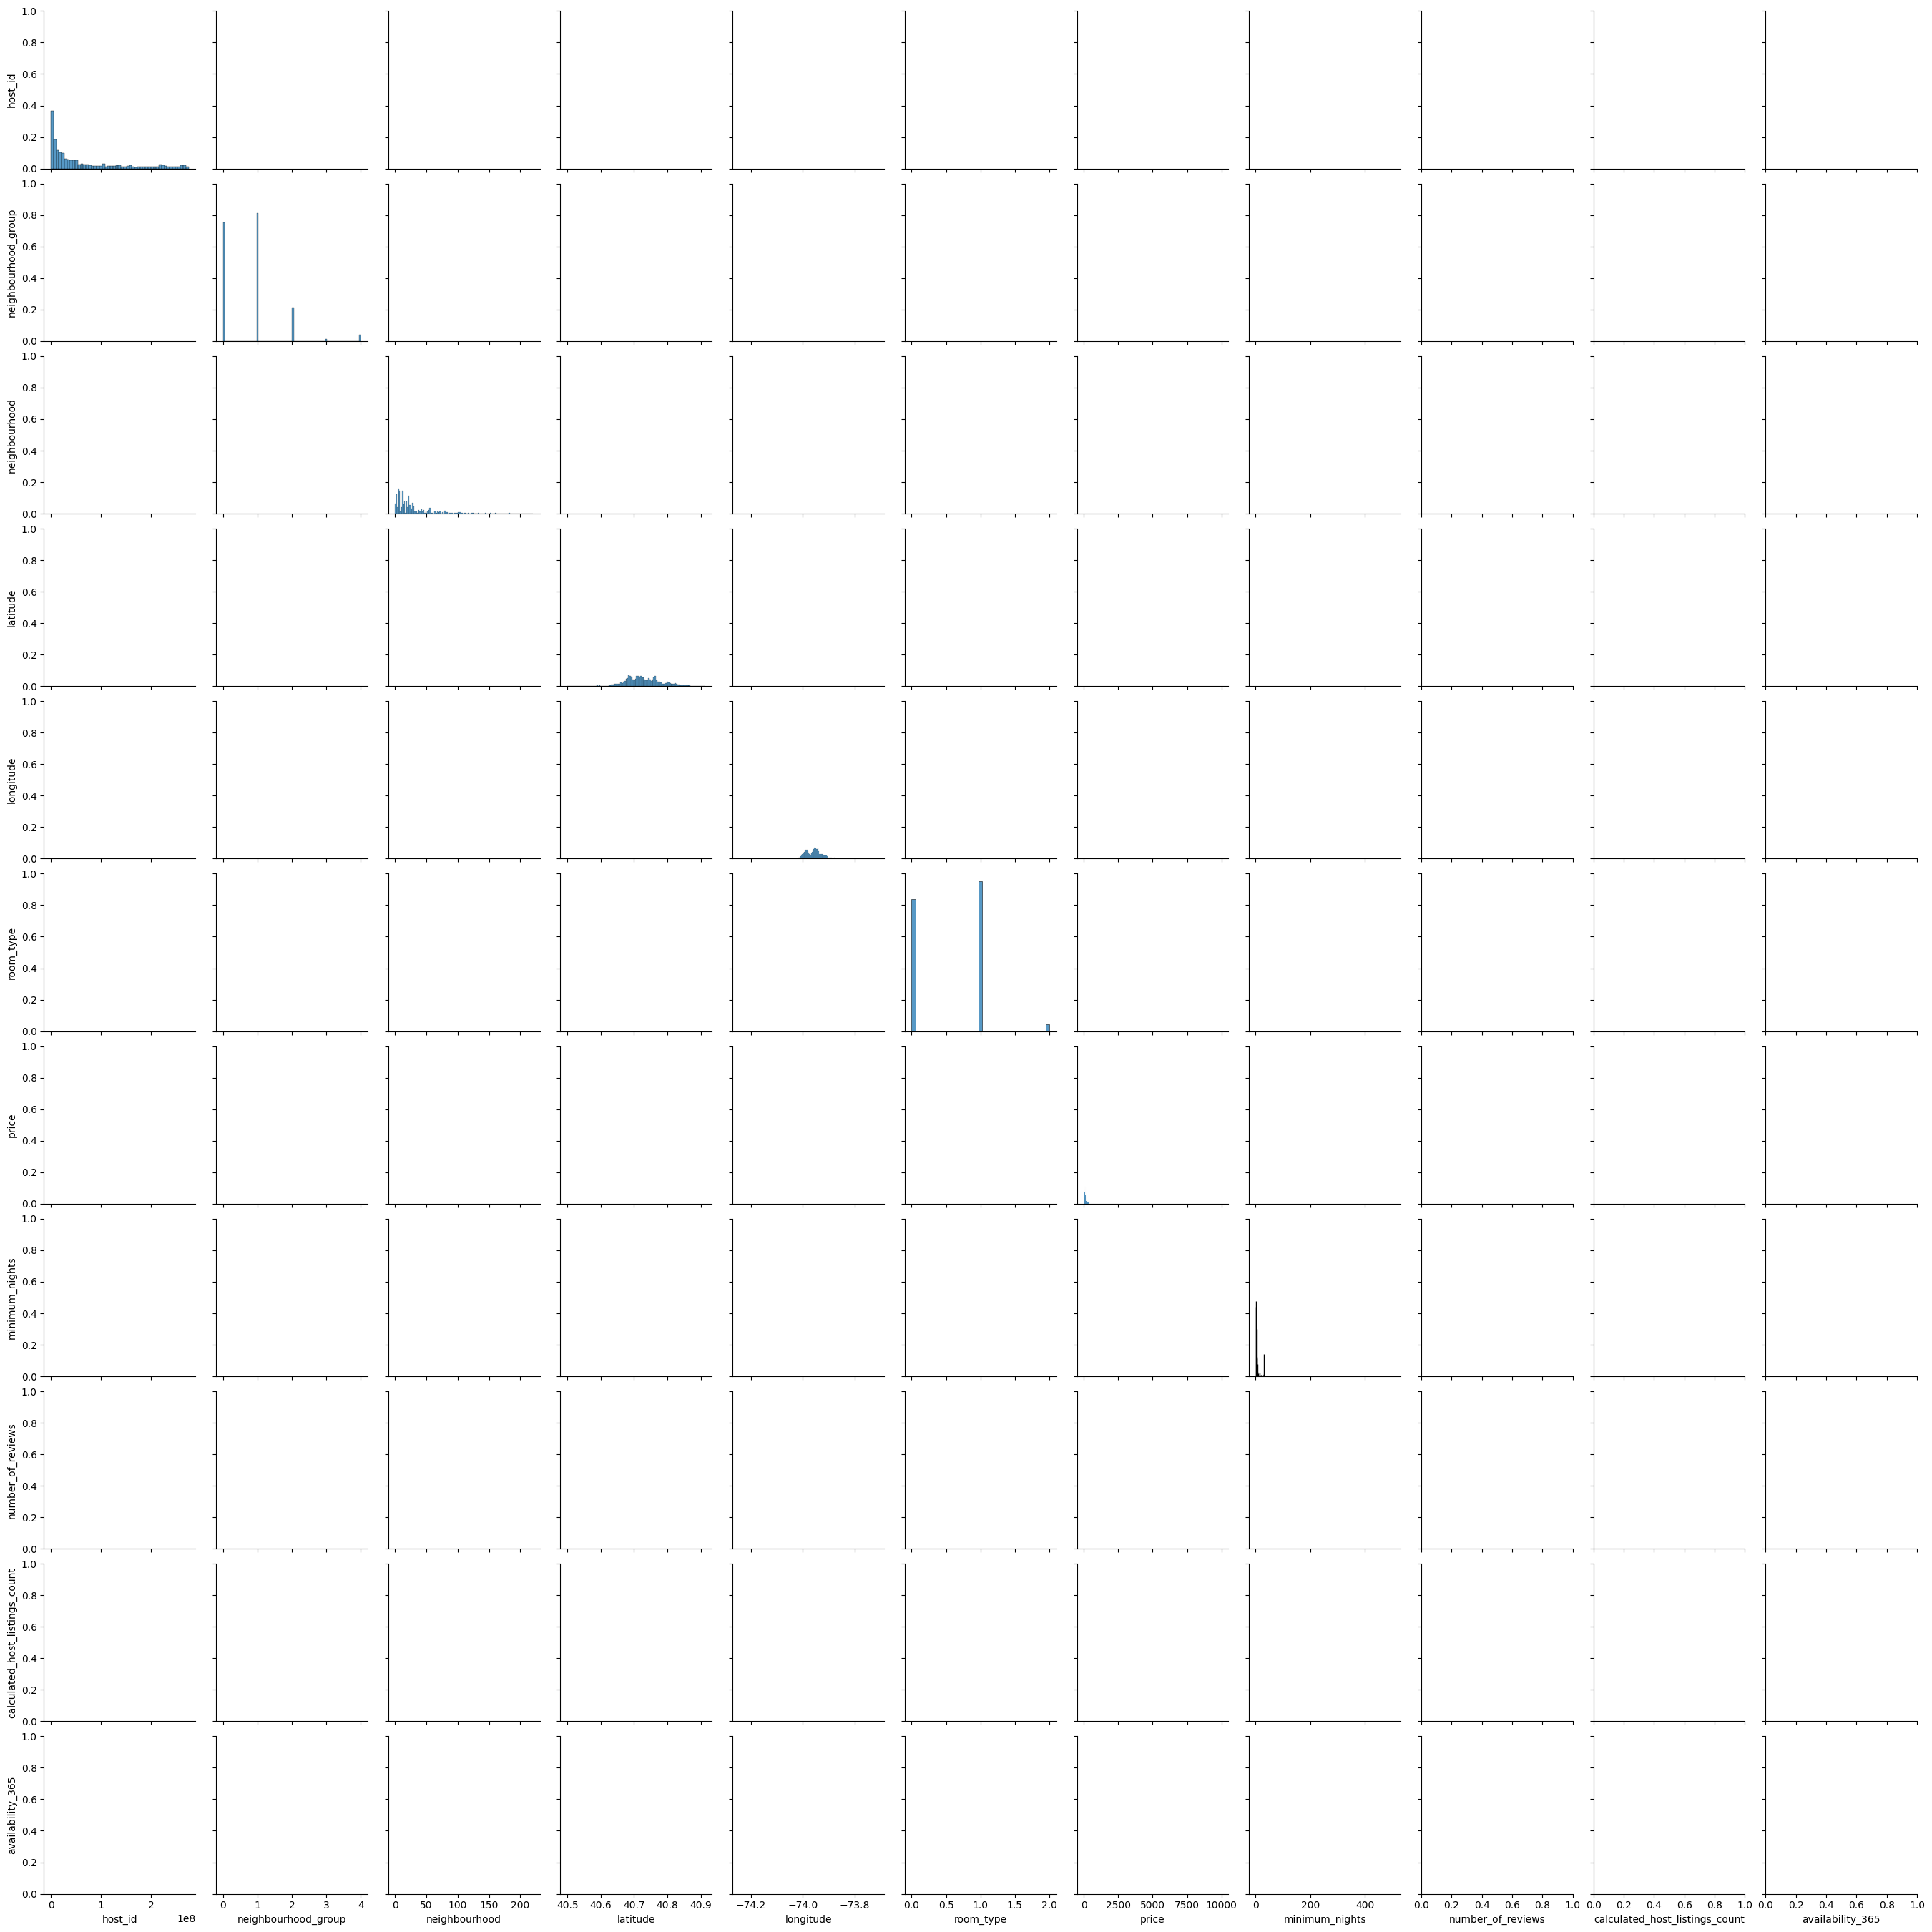

In [60]:
sns.pairplot(data = data)

In [75]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


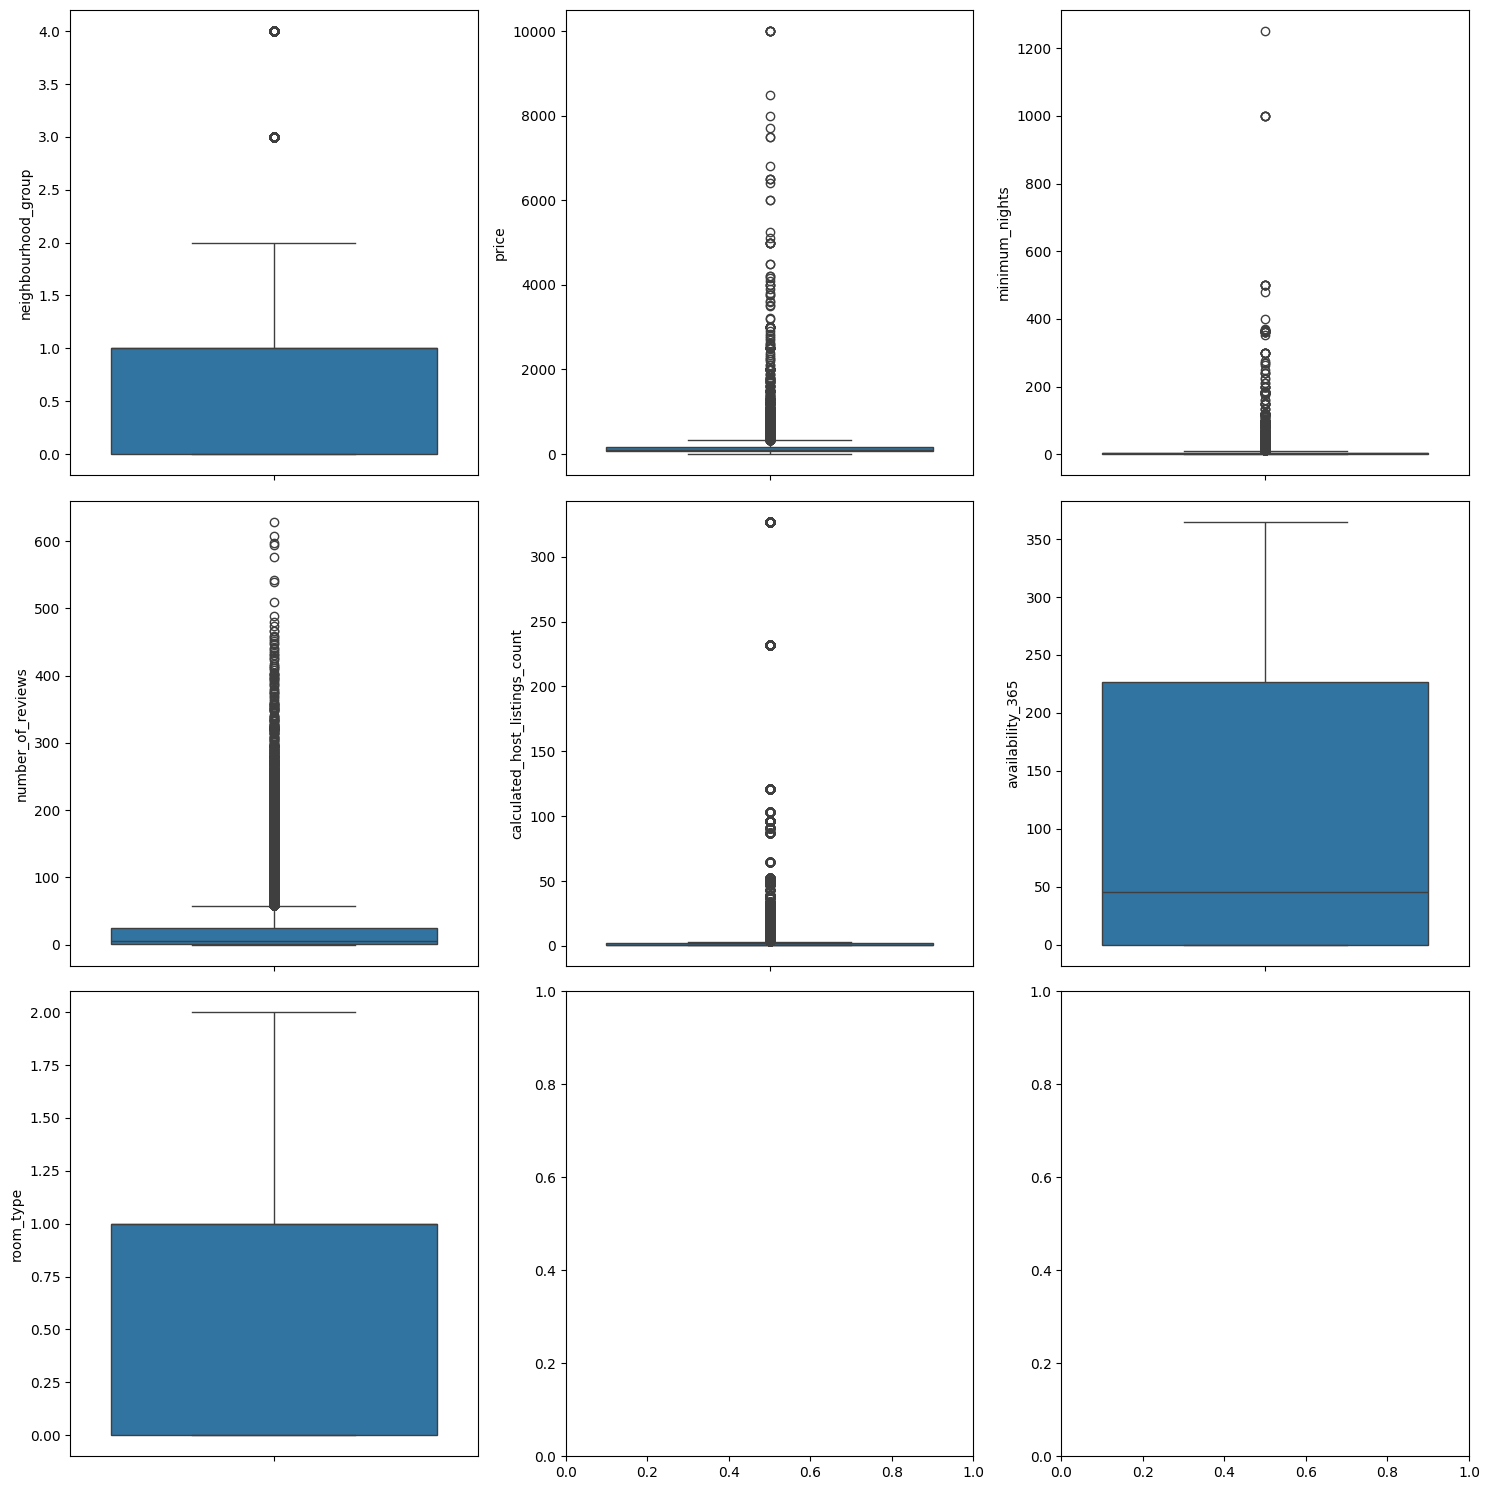

In [62]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = data, y = "price")
sns.boxplot(ax = axes[0, 2], data = data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = data, y = "room_type")

plt.tight_layout()

plt.show()

In [76]:
price_stats = data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [83]:
def clean_column(column_data,fill_value=None):
  # Calculate IQR
  Q1 = column_data.quantile(0.25)
  Q3 = column_data.quantile(0.75)
  IQR = Q3 - Q1

  # Define bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  if fill_value is not None:
    column_data = column_data.fillna(fill_value)
  # Remove outliers
  return column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]


In [85]:
numerical_cols = data[.select_dtypes(include='number')
]
# Apply cleaning function to numerical columns
df_cleaned = numerical_cols.apply(clean_column, axis=1)

# Join cleaned numerical columns with original non-numerical columns
data_cleaned = pd.concat([df_cleaned, data.select_dtypes(exclude='number')], axis=1)

In [86]:
print(data.info())
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB
None
<class 'pandas.core.frame.DataF

In [97]:
data_cleaned = data_cleaned.dropna()
data_cleaned.isnull().sum().sort_values(ascending = False)

availability_365                  0
calculated_host_listings_count    0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
price                             0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
dtype: int64

In [94]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_cleaned[num_variables])
df_scal = pd.DataFrame(scal_features, index = data_cleaned.index, columns = num_variables)
df_scal["price"] = data_cleaned["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,price
0,0.014308,0.000000,0.015337,1.000000,149.0
1,0.071542,0.000000,0.003067,0.972603,225.0
2,0.000000,0.001601,0.000000,1.000000,150.0
3,0.429253,0.000000,0.000000,0.531507,89.0
4,0.014308,0.007206,0.000000,0.000000,80.0


In [95]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365
0,0.139905,0.000801,0.0,0.698630
1,0.001590,0.023219,0.0,0.600000
2,0.151033,0.004804,0.0,0.238356
3,0.276630,0.000000,0.0,0.646575
4,0.011129,0.000801,0.0,0.084932


In [96]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)